<a href="https://colab.research.google.com/github/Saharmgh/ML-bootcamp/blob/main/ICA_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

%matplotlib inline

Creat tiny signals

In [ ]:
np.random.seed(23)

#number of samples
ns= np.linspace(0,200, 1000)

#source matrix
S =np.array([np.sin(ns), signal.sawtooth(ns*1.9), np.random.random(len(ns))])

#mixing matrix (demixing or unmixing matrix as well)
A= np.array([[0.5, 1, 0.2], [1,0.5,0.4], [0.5,0.8,1]])

#mixed signal matrix
X= np.dot(A, S)
print(X.shape, A.shape, S.shape)

(3, 1000) (3, 3) (3, 1000)


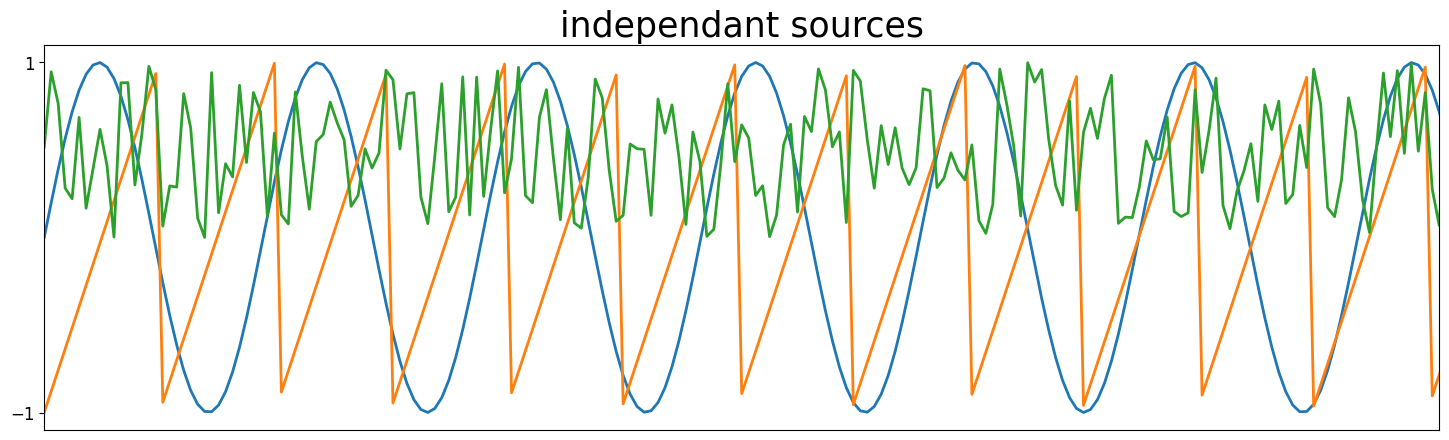

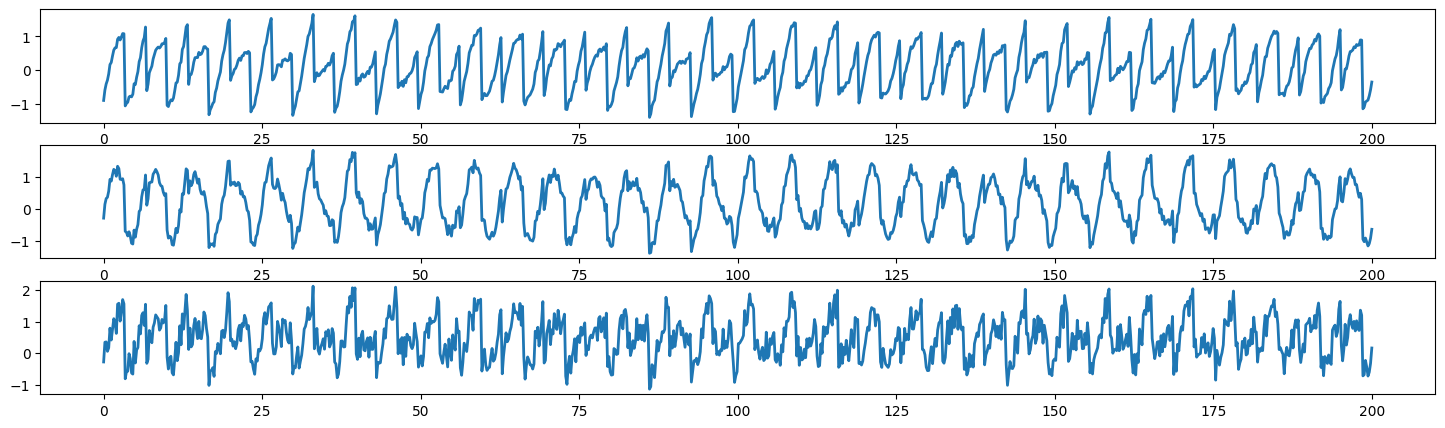

In [ ]:
#Plot sources
fig, ax= plt.subplots(1,1, figsize= [18,5])
ax.plot(ns, S.T, lw= 2)
ax.set_xticks([])
ax.set_yticks([-1,1])
ax.set_xlim(ns[0], ns[200])
ax.tick_params(labelsize= 12)
ax.set_title('independant sources', fontsize= 25)

fig, ax= plt.subplots(3,1, figsize= [18,5])
ax[0].plot(ns, X[0], lw=2)
ax[1].plot(ns, X[1], lw=2)
ax[2].plot(ns, X[2], lw=2)


Proprocessing the data

In [ ]:
#centering
def stand(x):
  x_mean = np.mean(x, axis=1, keepdims= True)
  centered_x= x - x_mean
  return centered_x


In [ ]:
x_mean = np.mean(X, axis=1, keepdims= True)
centered_x= X - x_mean
cov_mat2= np.cov(centered_x)
eps = 1e-9
eigvalue, eigvec= np.linalg.eigh(cov_mat2)
# indx2= np.argsort(eigvalue)[::-1]
# eigvalue_sorted = eigvalue[indx2]
# eigvec_sorted= eigvec[:,indx2]
whiten_vec= np.diag(1.0 / np.sqrt(eigvalue+eps))
whitening = np.dot(np.dot(eigvec, whiten_vec), eigvec.T)
whiten_x= np.dot(whitening, centered_x)

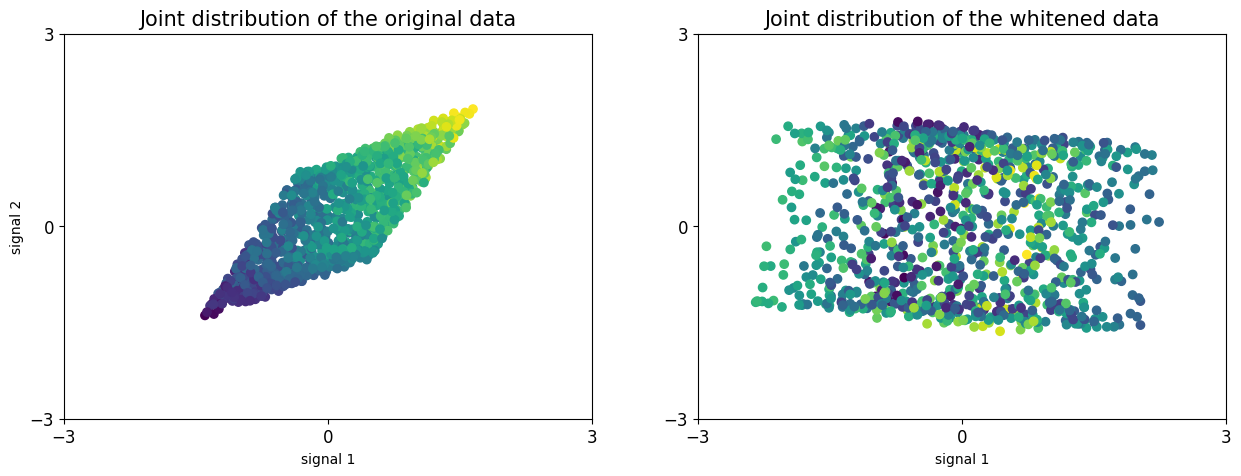

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=[15, 5])
ax[0].scatter(X[0], X[1], c= X[2])
ax[0].tick_params(labelsize=12)
ax[0].set_yticks([-3, 0, 3])
ax[0].set_xticks([-3, 0, 3])
ax[0].set_xlabel('signal 1', fontsize=10)
ax[0].set_ylabel('signal 2', fontsize=10)
ax[0].set_title('Joint distribution of the original data', fontsize=15)

ax[1].scatter(whiten_x[0], whiten_x[1], c= whiten_x[2])
ax[1].tick_params(labelsize=12)
ax[1].set_yticks([-3, 0, 3])
ax[1].set_xticks([-3, 0, 3])
ax[1].set_xlabel('signal 1', fontsize=10)
ax[0].set_ylabel('signal 2', fontsize=10)
ax[1].set_title('Joint distribution of the whitened data', fontsize=15)
plt.show()